In [1]:
from read import read_features

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
import numpy as np
np.random.seed(42) # for reproducibility, antes de imports de keras

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt

# Preparacion de los datos

In [4]:
file = './features/21_20151016_noon.csv'
X, y = read_features(file, features=[0, 1])
#X, y = read_features(file)

In [5]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [6]:
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

In [7]:
# Tenemos que pasar de X de (885,n_features) a (885,n_features,1) para trabajar con RNN (LSTM, GRU, ...)
X_rs = np.reshape(X, (885,X.shape[1],1))
X_minmax_rs = np.reshape(X_minmax, (885, X_minmax.shape[1],1))
X_standar_rs = np.reshape(X_standar, (885, X_standar.shape[1],1))

# Tenemos que pasar de y de (885,) a (885,1)
y_rs = np.reshape(y, (885,1))

# GRU

In [8]:
# A parte de plotear las predicciones devuelve el modelo
# layers = numero de capas OCULTAS
def gru_predictions_plot(X, y, neurons=15, layers=2, verbose=1):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = Sequential()
    model.add(GRU(neurons, input_shape=(None, 1), return_sequences=True))
    
    #Internal layers
    for i in range(layers-1):
        model.add(GRU(neurons, return_sequences=True))
    model.add(GRU(neurons))
    
    model.add(Dense(1))

    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=verbose)
    optimizer = Adam(beta_1=0.9, beta_2=0.999, lr=0.01, decay=1e-4)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    #model.summary()
    
    model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=verbose, callbacks=[early_stop])

    prediction = model.predict(X)
    mse = mean_squared_error(y, prediction)

    plt.figure(figsize=(20, 8))
    plt.plot(y, color='black')
    plt.plot(prediction, color='red')
    plt.title(f'GRU: neuronas={neurons}, capas_ocultas={layers}, mse={mse:.4f}')
    plt.show()
    
    return model

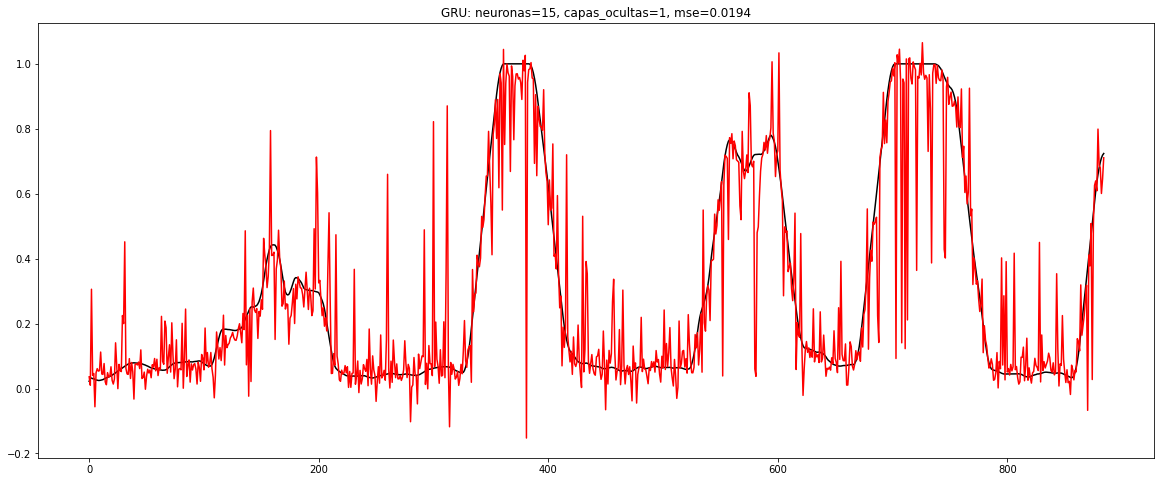

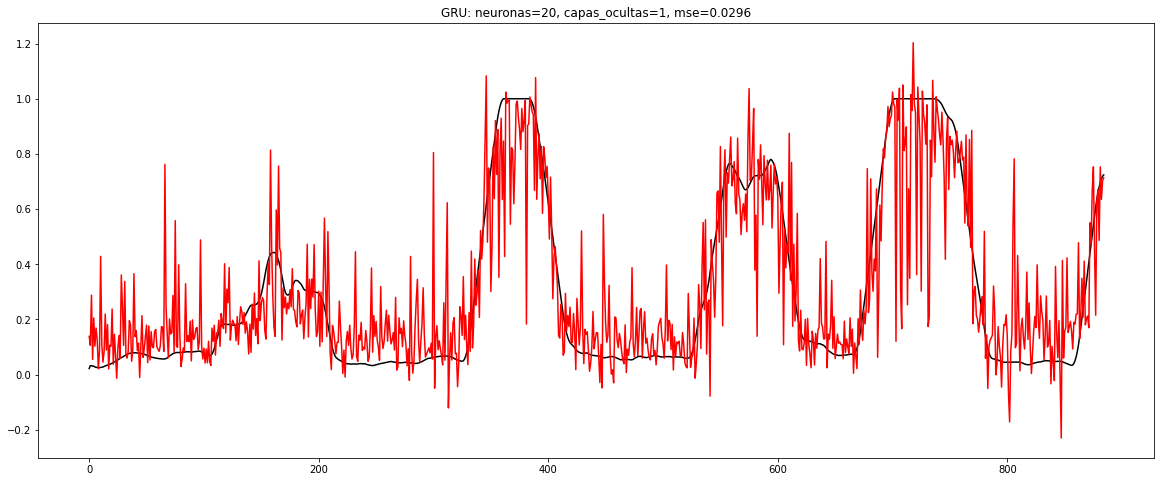

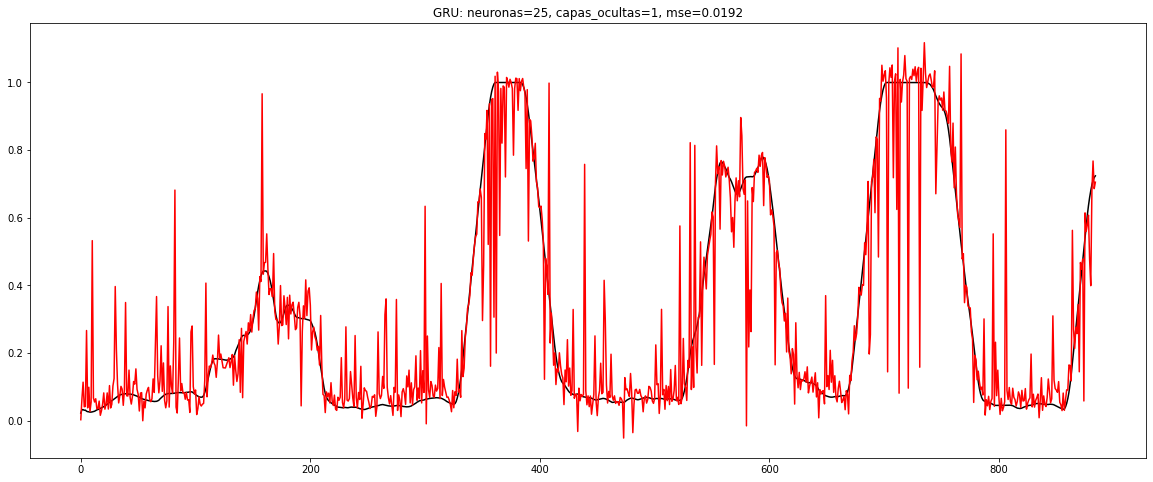

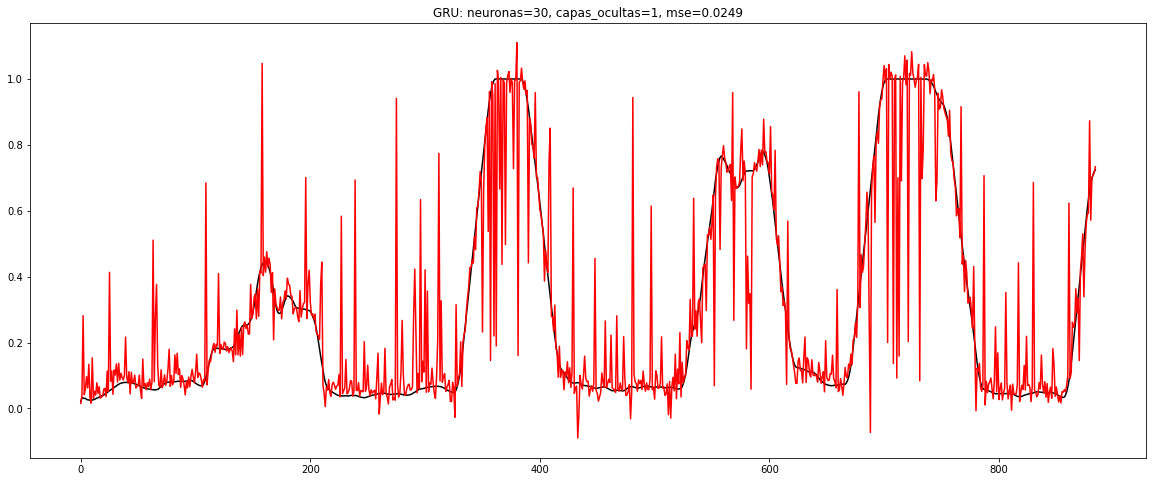

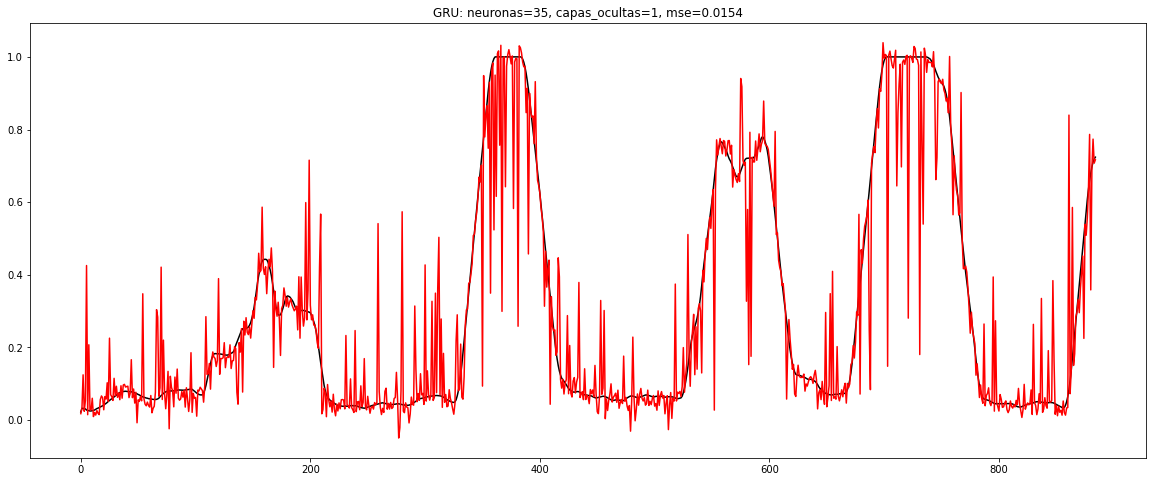

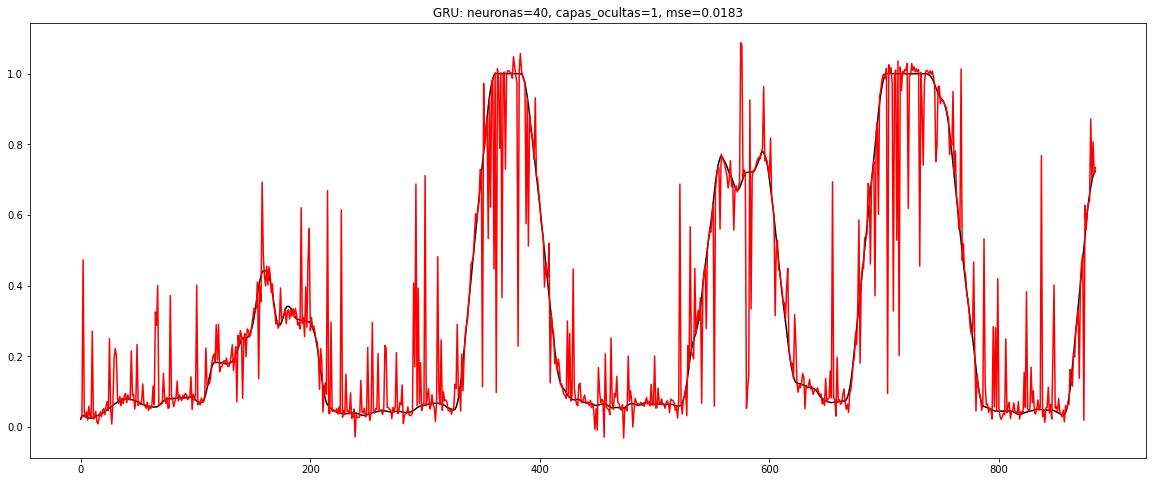

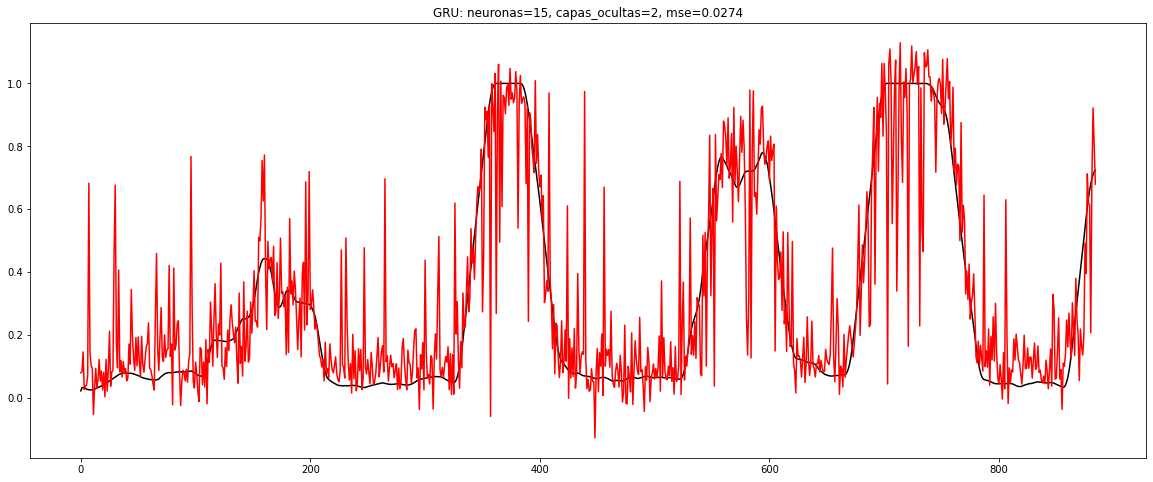

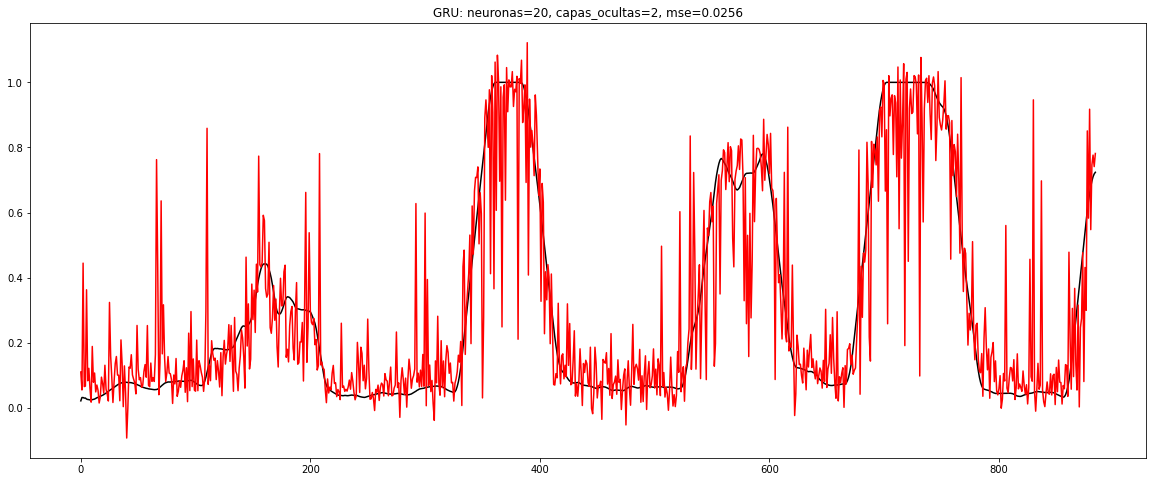

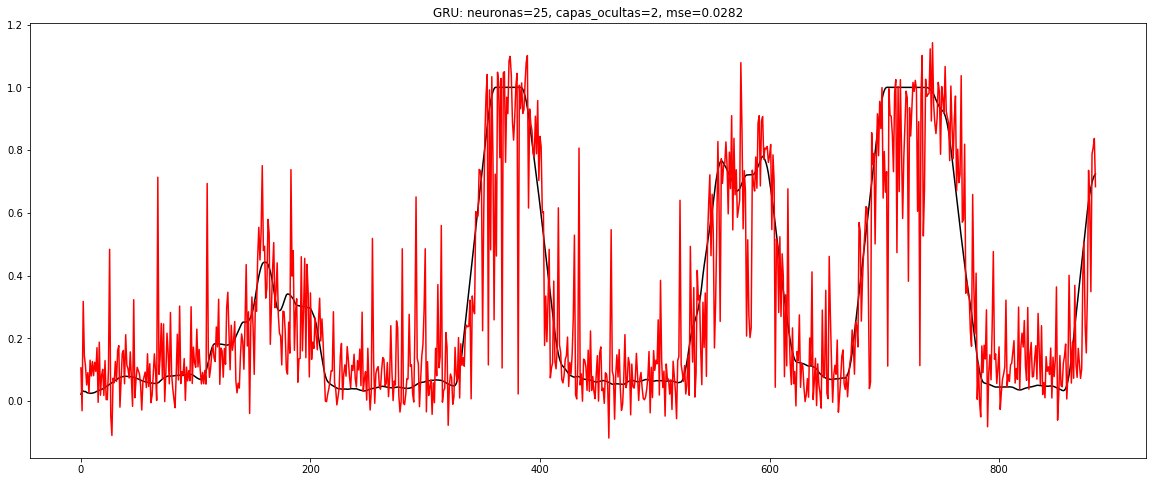

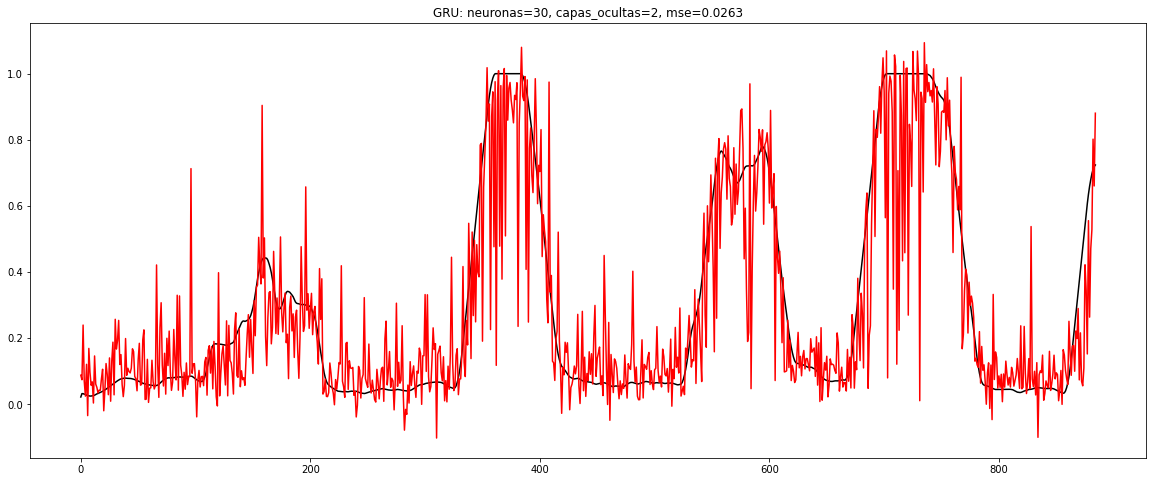

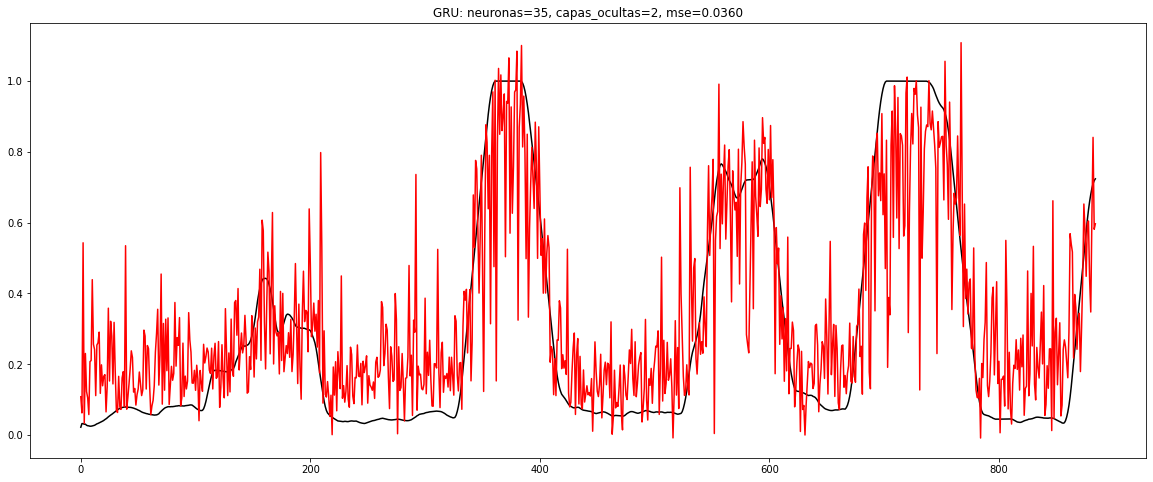

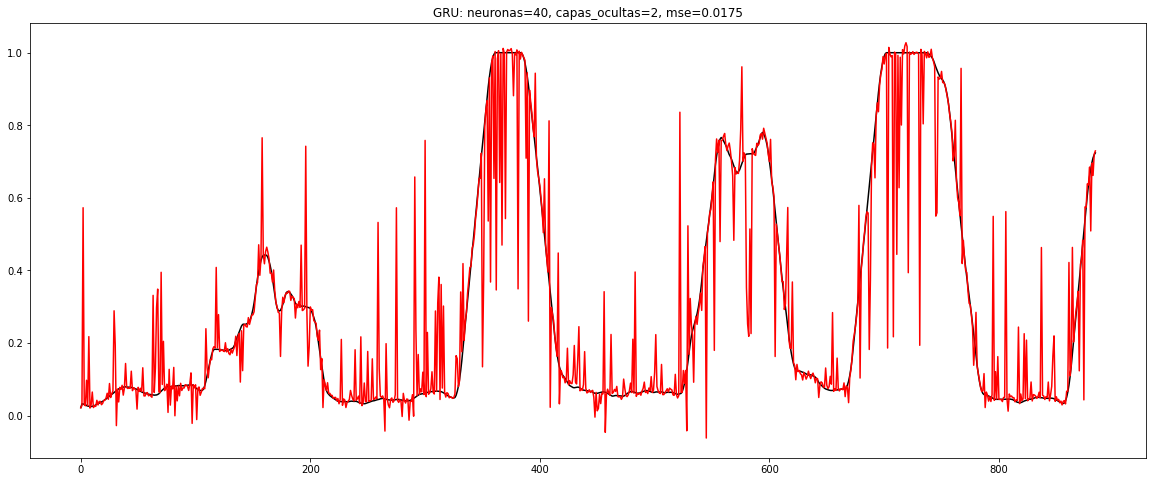

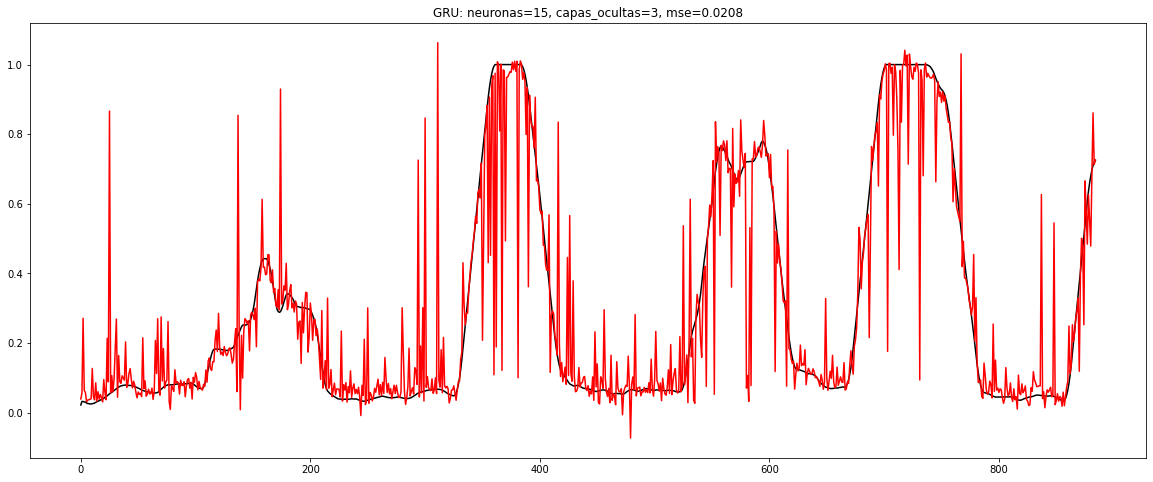

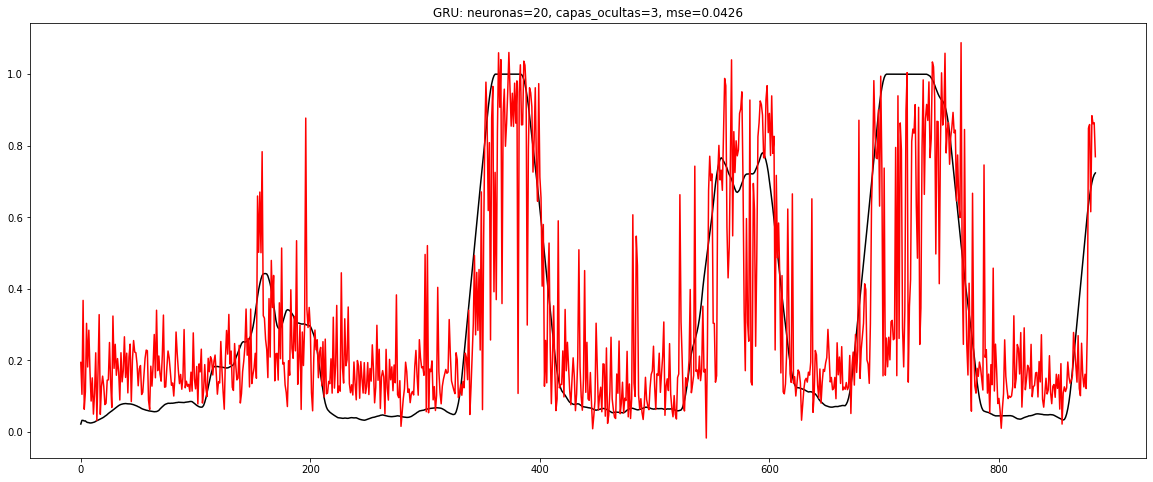

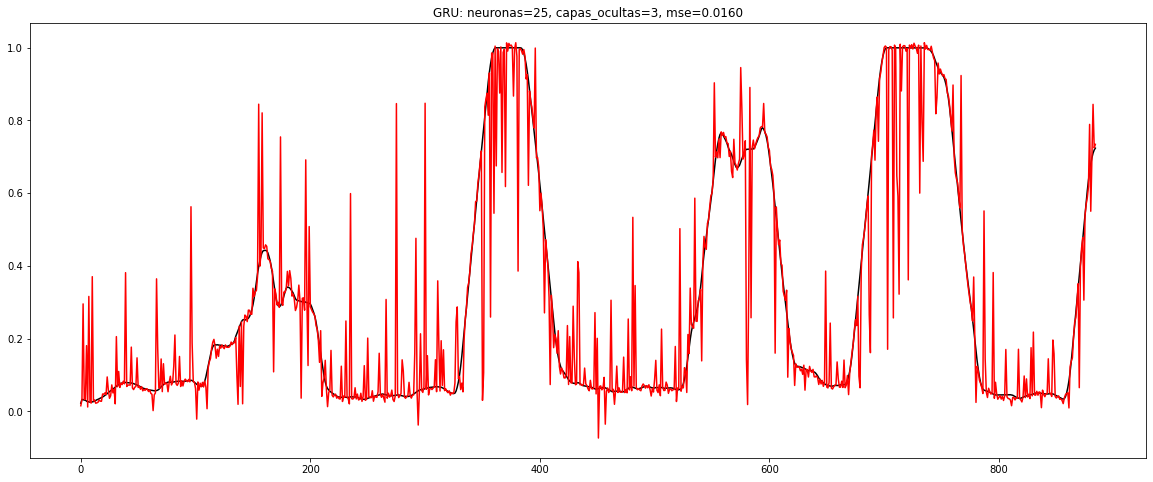

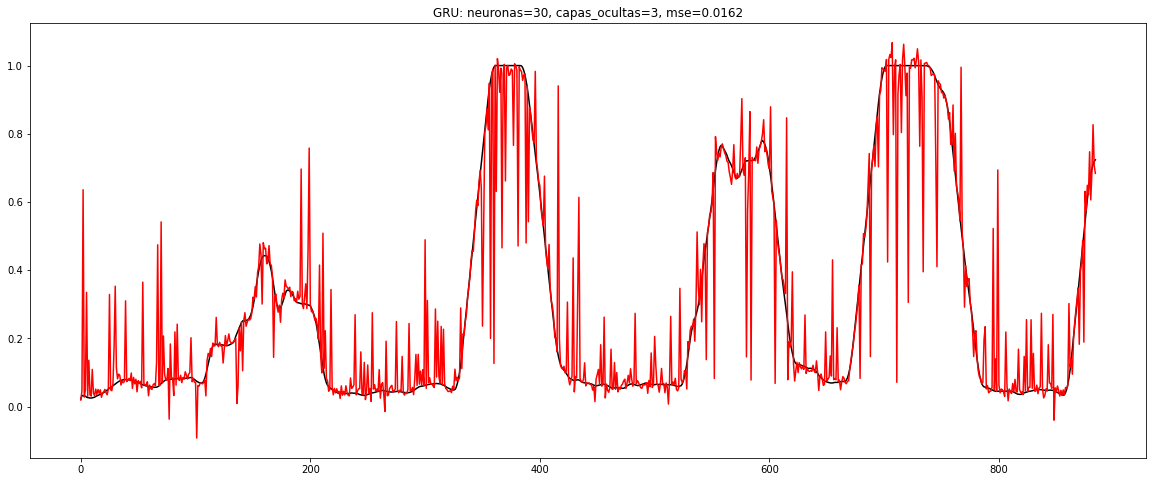

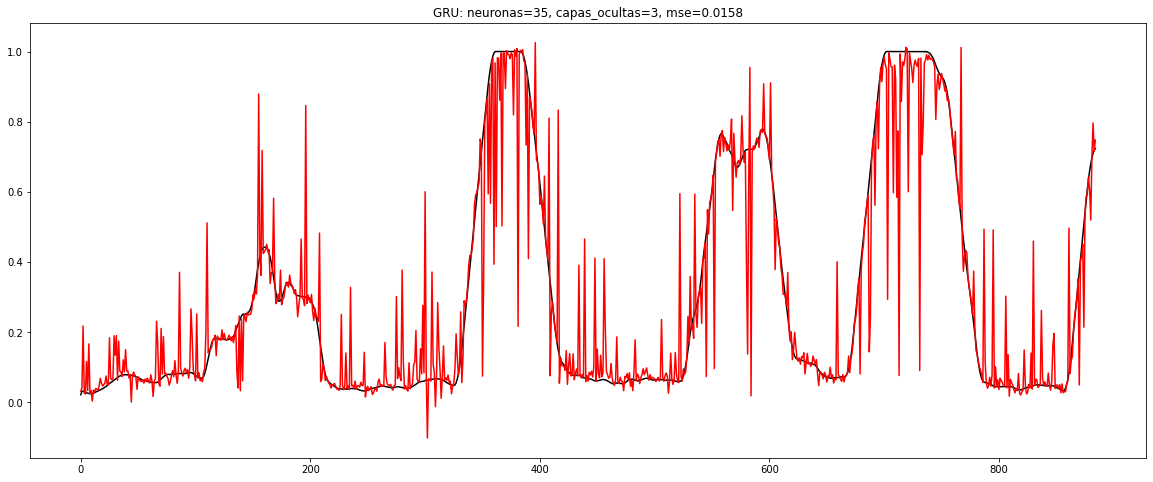

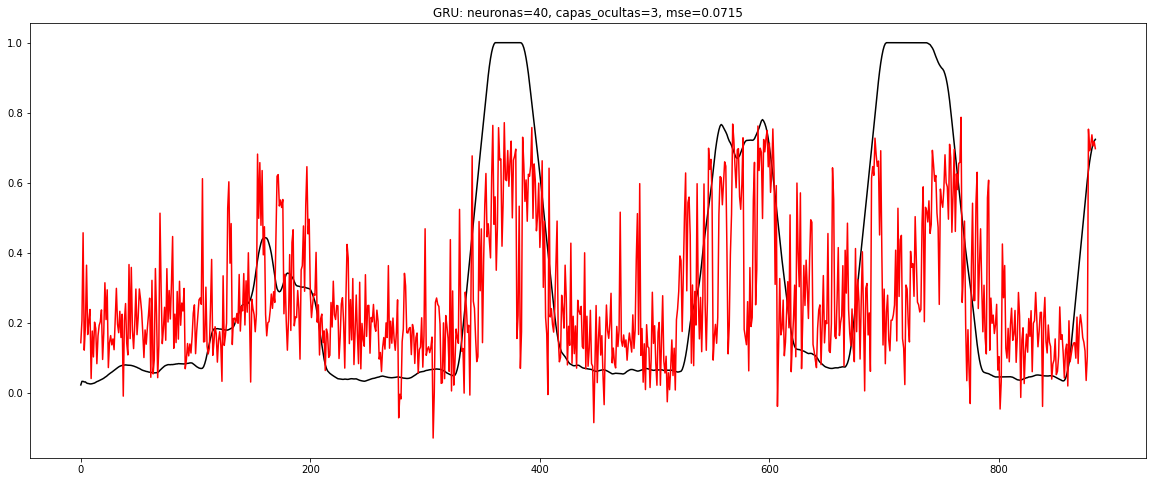

In [10]:
gru_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=1, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=1, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=1, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=1, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=1, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=1, verbose=0)

gru_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=2, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=2, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=2, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=2, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=2, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=2, verbose=0)

gru_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=3, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=3, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=3, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=3, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=3, verbose=0)
gru_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=3, verbose=0)

# Bidirectional GRU

In [13]:
from keras.layers import Bidirectional

def bid_predictions_plot(X, y, neurons=15, layers=2, verbose=1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = Sequential()
    model.add(Bidirectional(GRU(neurons, input_shape=(None, 1), return_sequences=True)))

    for i in range(layers-1):
        model.add(Bidirectional(GRU(neurons, return_sequences=True)))
        
    model.add(Bidirectional(GRU(neurons)))
    model.add(Dense(1))
              
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=verbose)
    optimizer = Adam(beta_1=0.9, beta_2=0.999, lr=0.01, decay=1e-4)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
          
    #model.summary()
    
    model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=verbose, callbacks=[early_stop])

    prediction = model.predict(X)
    mse = mean_squared_error(y, prediction)

    plt.figure(figsize=(20, 8))
    plt.plot(y, color='black')
    plt.plot(prediction, color='red')
    plt.title(f'BID(GRU): neuronas={neurons}, capas_ocultas={layers}, mse={mse:.4f}')
    plt.show()

In [14]:
#bid_predictions_plot(X_standar_rs, y_rs, neurons=15, layers=1, verbose=1)

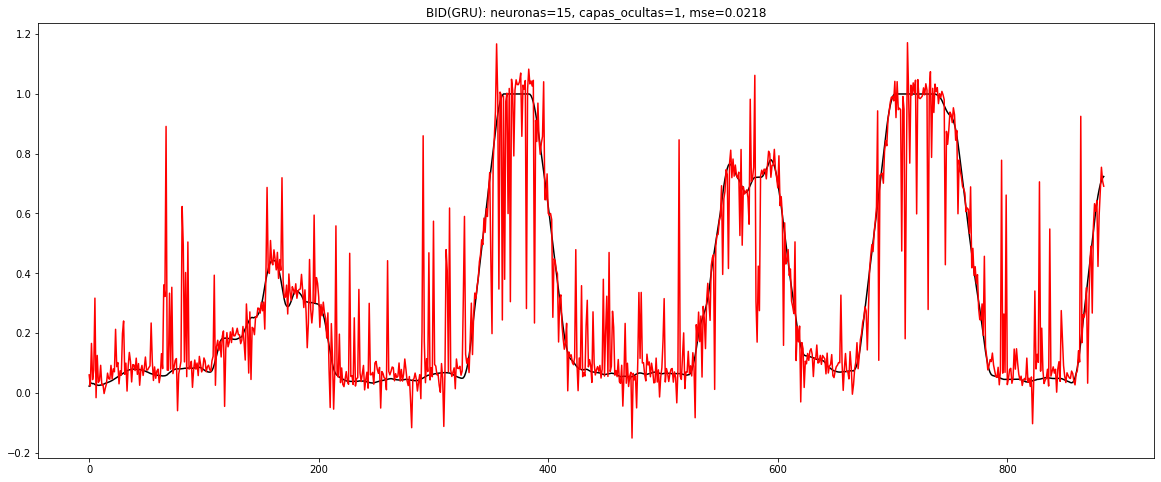

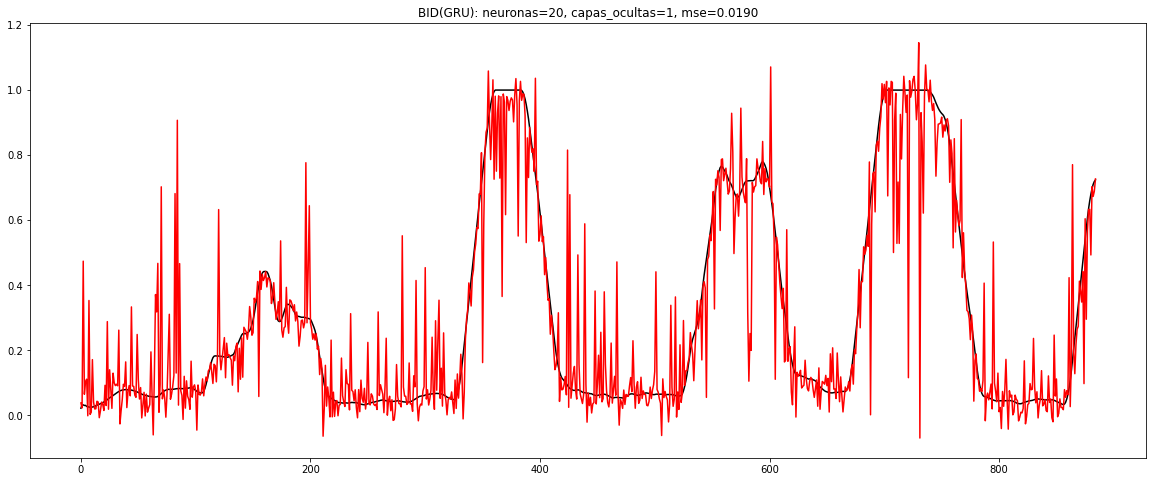

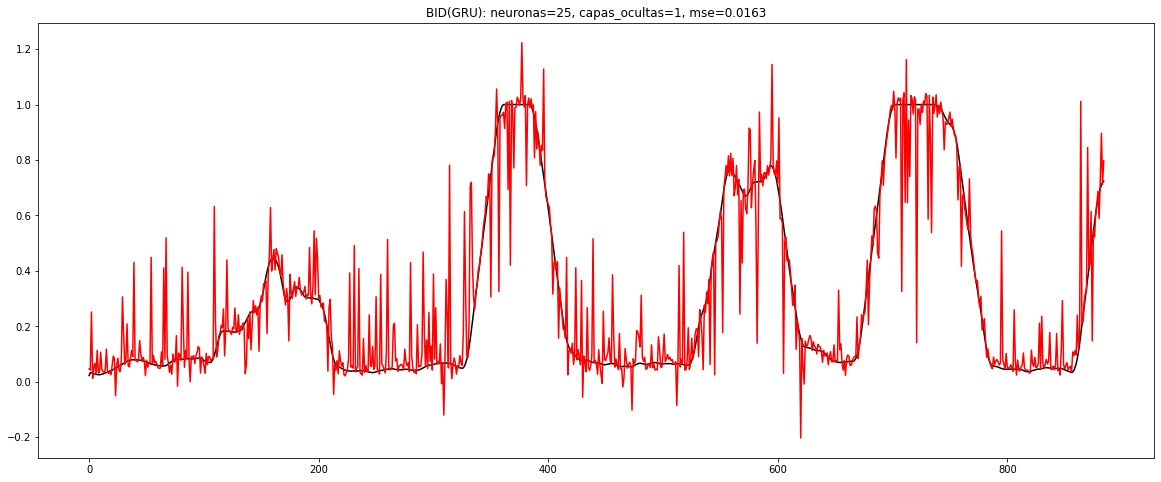

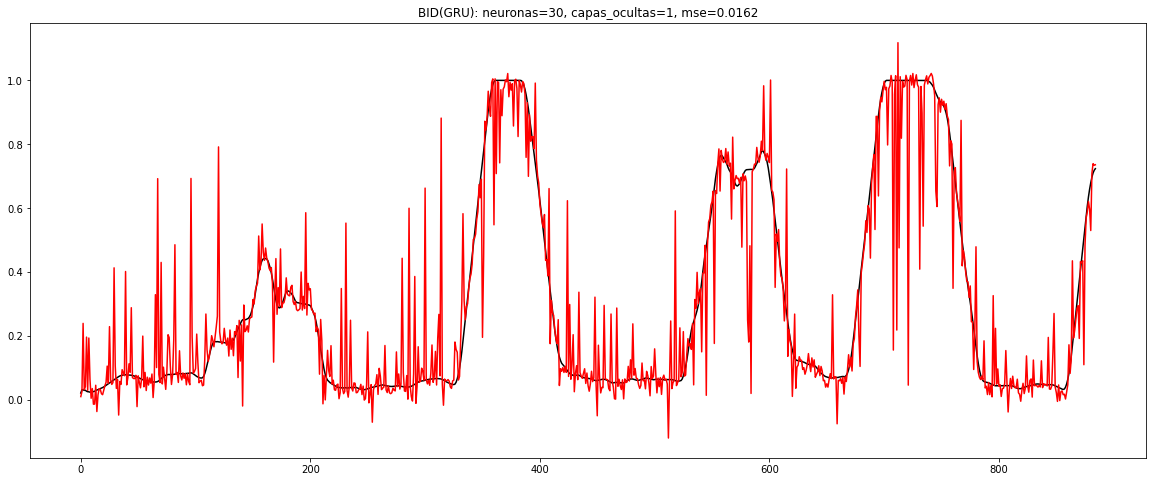

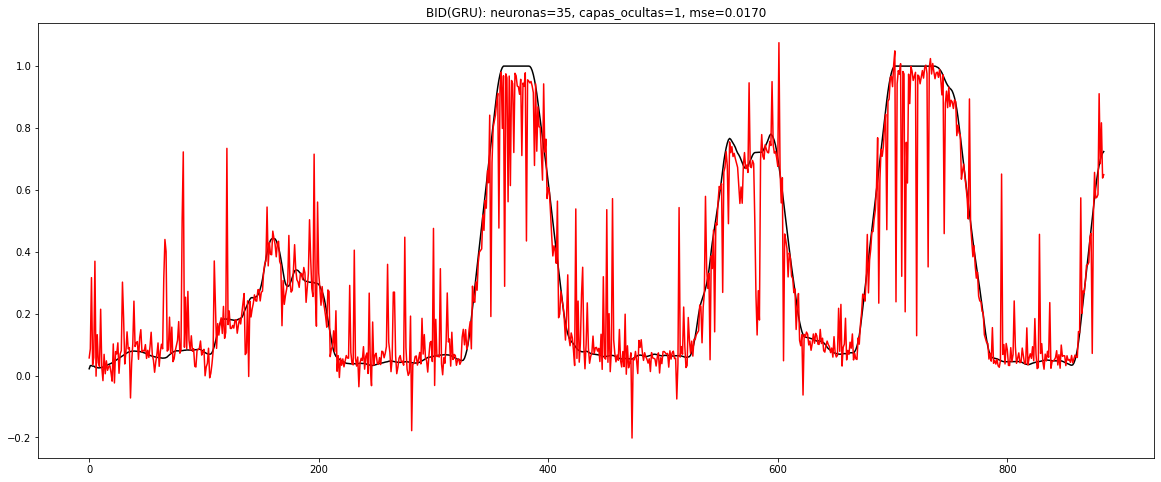

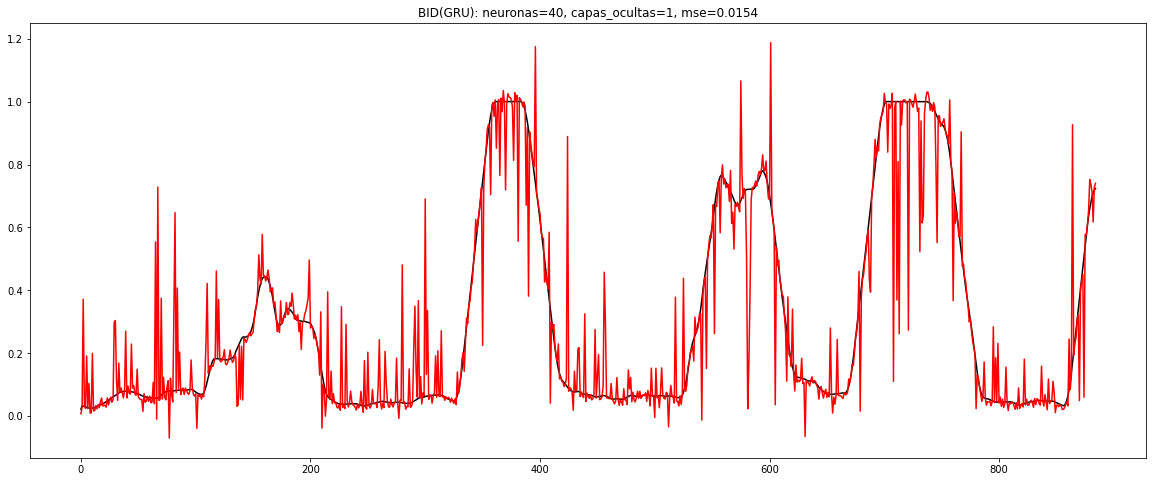

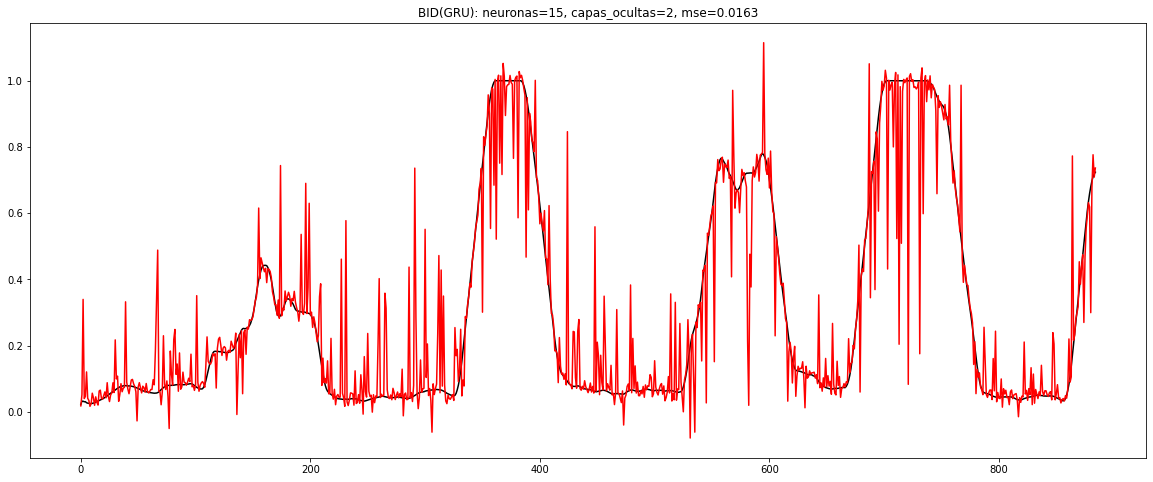

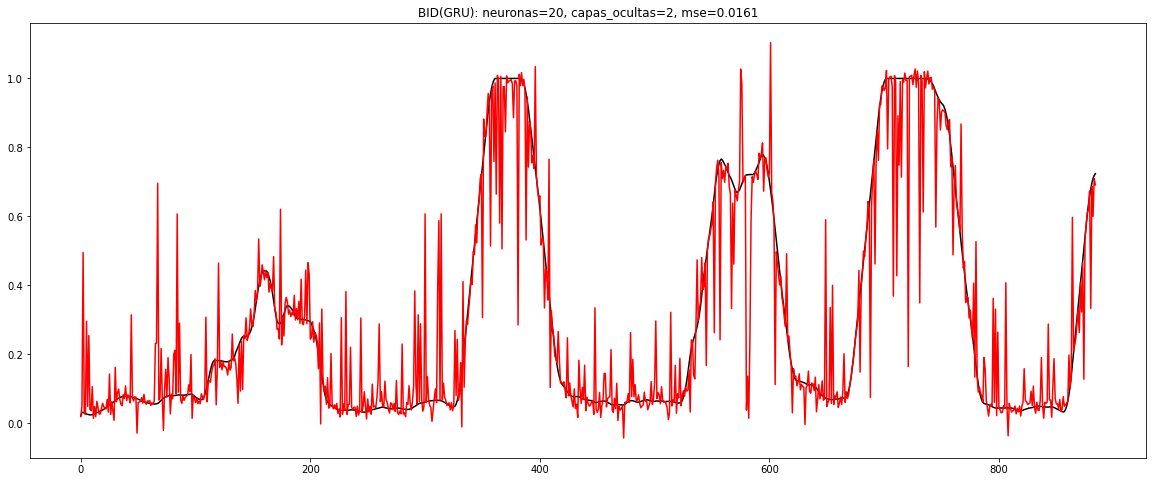

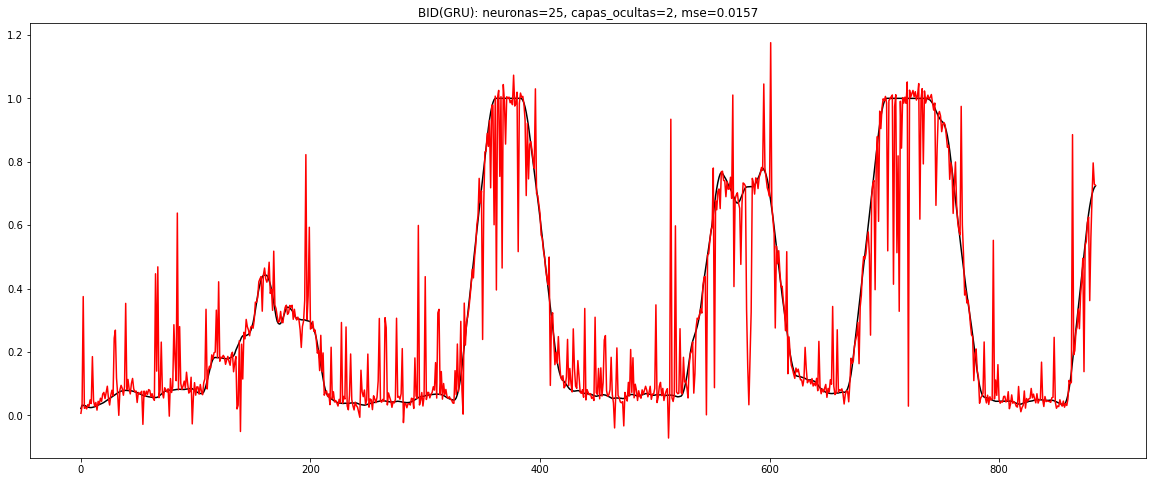

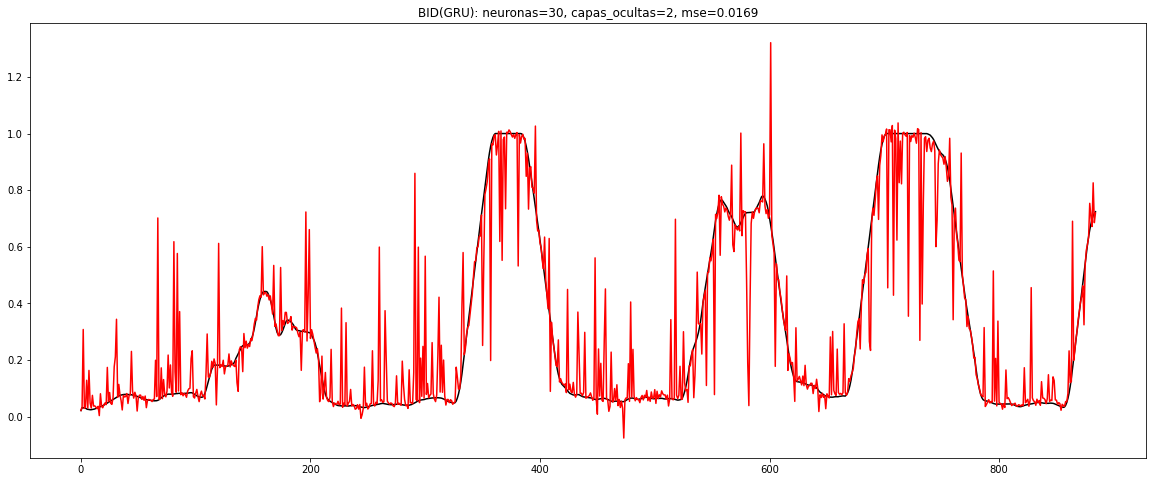

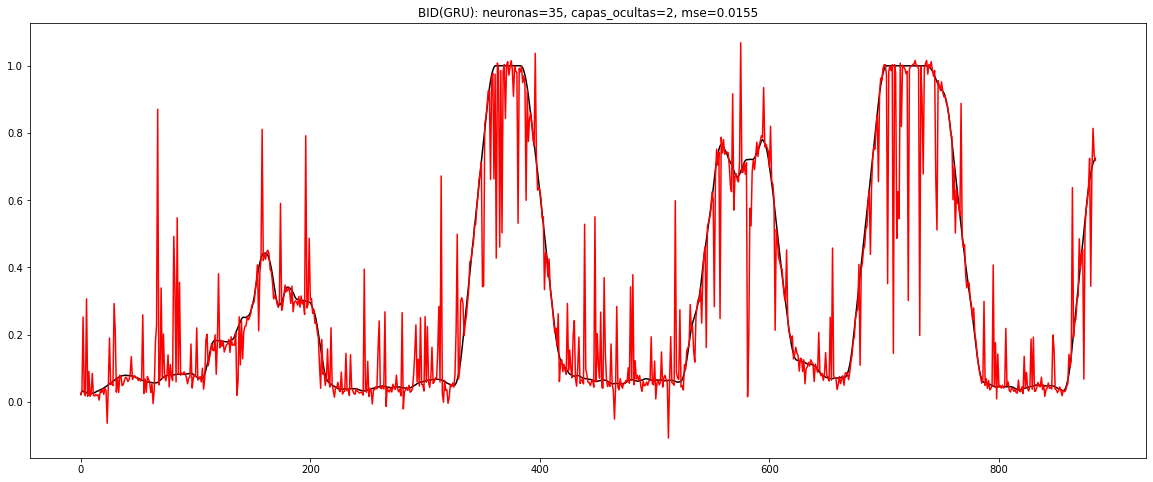

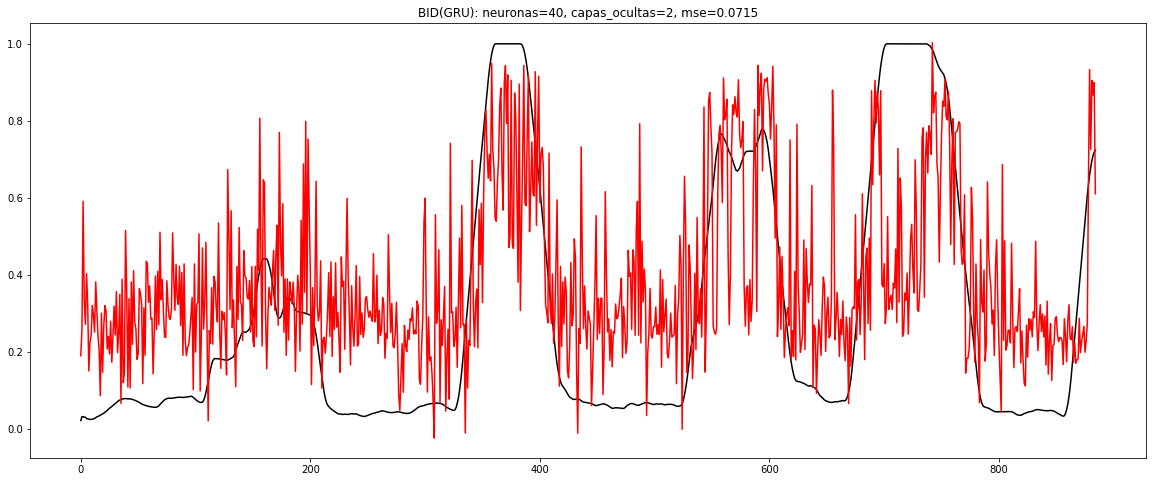

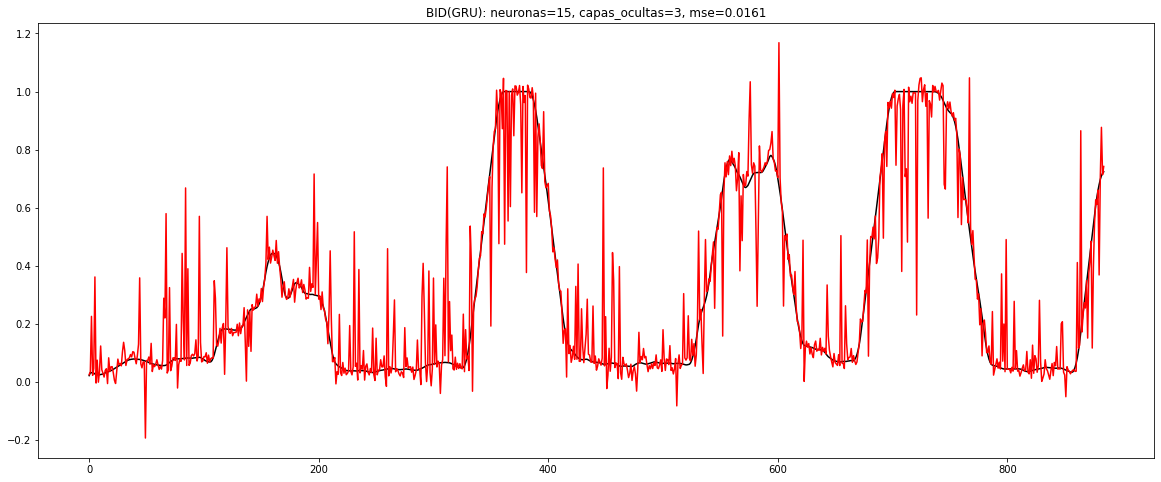

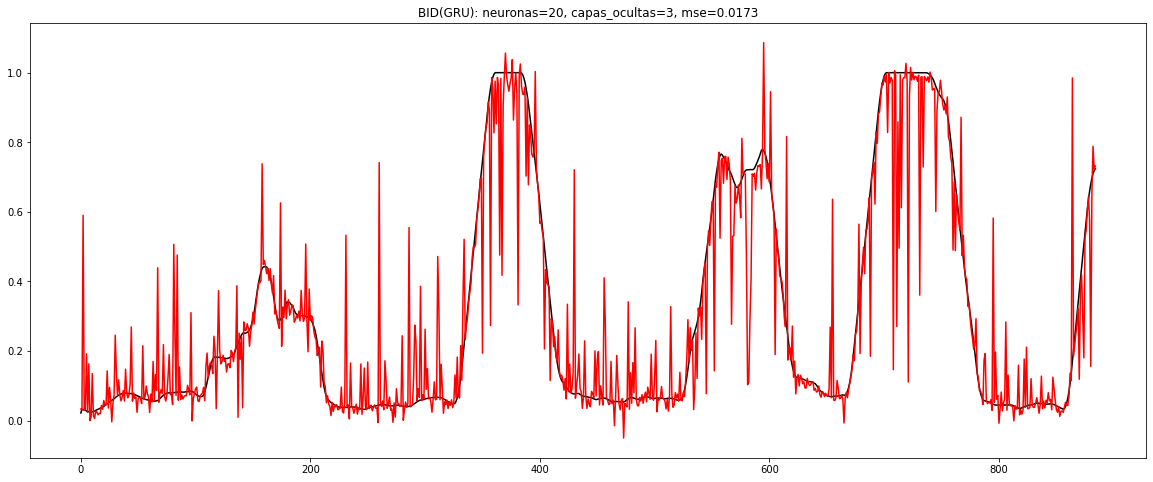

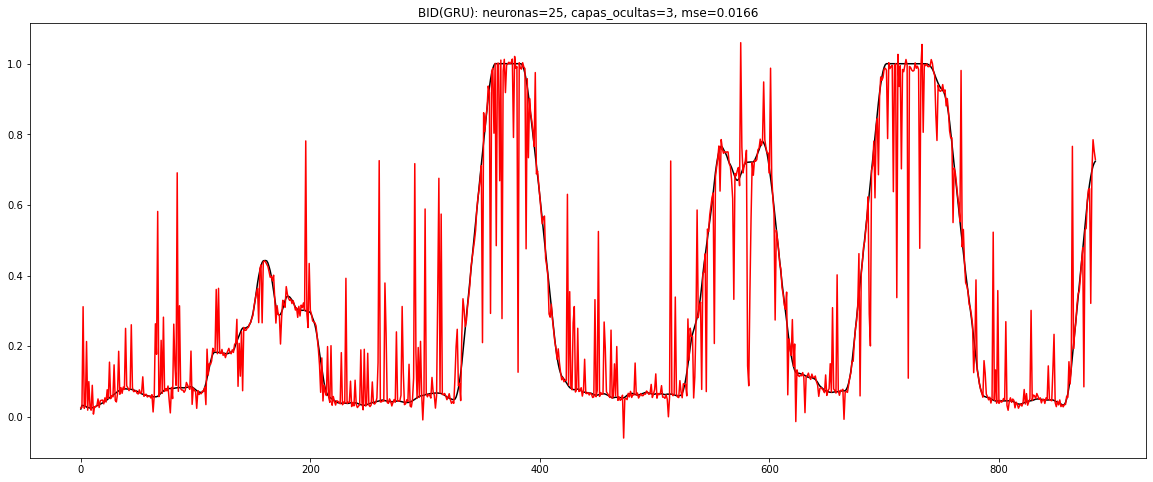

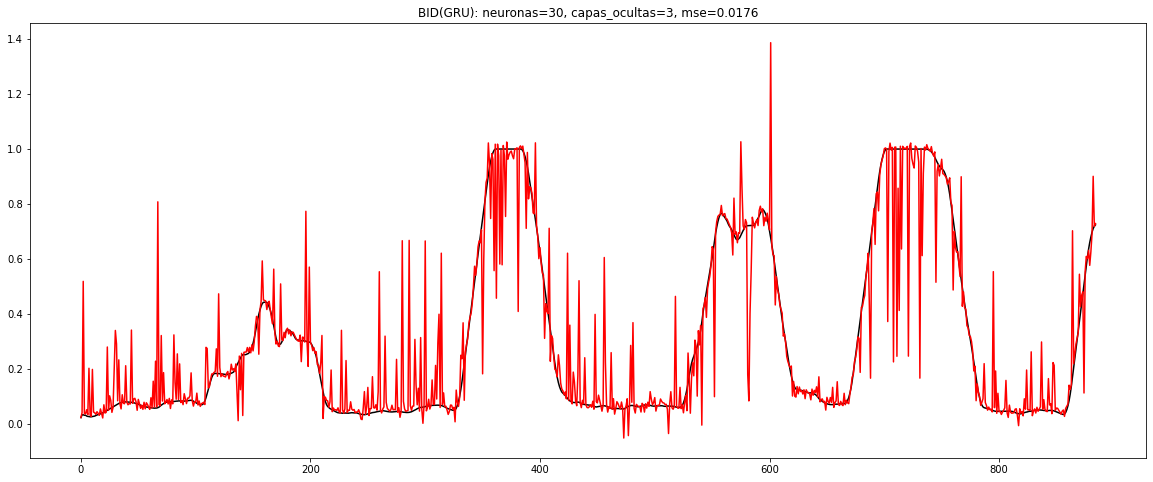

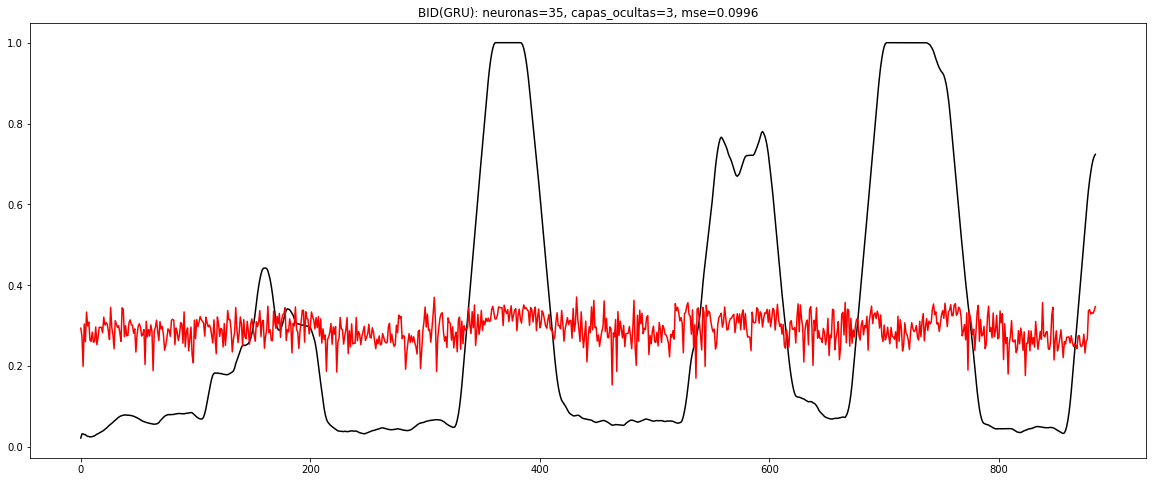

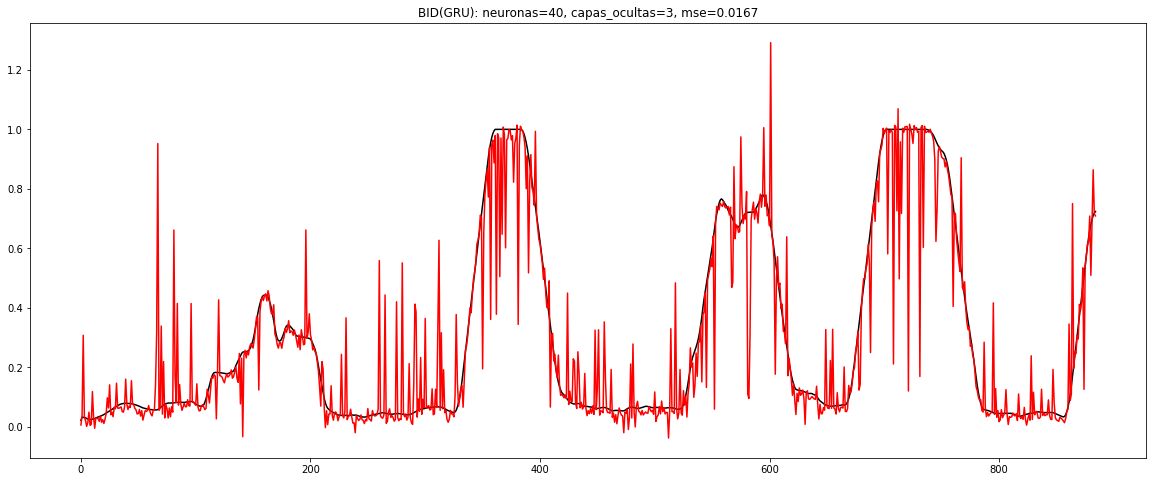

In [15]:
bid_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=1, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=1, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=1, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=1, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=1, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=1, verbose=0)

bid_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=2, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=2, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=2, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=2, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=2, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=2, verbose=0)

bid_predictions_plot(X_standar_rs, y_rs, neurons=15,layers=3, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=20,layers=3, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=25,layers=3, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=30,layers=3, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=35,layers=3, verbose=0)
bid_predictions_plot(X_standar_rs, y_rs, neurons=40,layers=3, verbose=0)